In [43]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import powerlaw

In [8]:
as_network = pd.read_csv('~/Downloads/as20000102.txt', sep='\t')

In [11]:
as_network_g = nx.from_pandas_edgelist(as_network, source='FromNodeId', target='ToNodeId')

In [17]:
nx.diameter(as_network_g)

9

In [12]:
def degree_distribution(g):
    list_degree = np.array(list(map(lambda x: x[1], g.degree)))
    max_degree = max(list_degree)
    freq_count_array = np.array([0]*(max_degree + 1))
    unique_degrees, frequencies = np.unique(list_degree, return_counts=True)
    def assign_value_to_array_at_pos(arr, pos, value):
        arr[pos] = value
    _ = list(map(lambda x: assign_value_to_array_at_pos(freq_count_array, x[0], x[1]) , zip(unique_degrees, frequencies)))
    return freq_count_array

In [13]:
degree_dist = degree_distribution(as_network_g)

In [15]:
list_degree = np.array(list(map(lambda x: x[1], as_network_g.degree)))

In [99]:
def plot_dist_from_values(values, log=(False, False)):
    data = pd.DataFrame()
    data['range'] = np.array(range(len(values)))
    data['Grado'] = values
    sns.kdeplot(data=data, x='Grado', log_scale=log)
    if log == (True, True):
        plt.title('Densidad de grado ' + '(escala log-log)')
    else:
        plt.title('Densidad de grado')

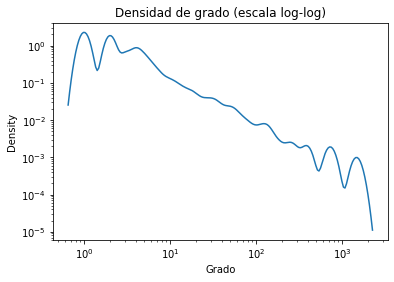

In [100]:
plot_dist_from_values(list_degree, (True, True))

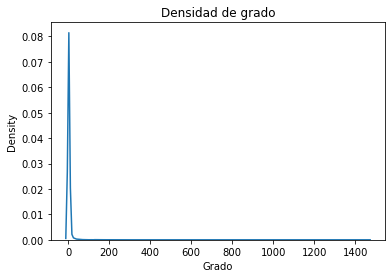

In [92]:
plot_dist_from_values(list_degree)

In [95]:
# por estimador de maxima verosimilitud se calcula alpha
# por kolmogorov se calcula xmin, valor para el cual vale la powerlaw
res = powerlaw.Fit(list_degree, discrete=True)
print(f"Alpha estimado: {res.power_law.alpha}")
print(f"Valor x_min: {res.power_law.xmin}")

Calculating best minimal value for power law fit
Alpha estimado: 2.1447323450937583
Valor x_min: 8.0
